# Example for Interval Fuzzy C Means

In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering, IntervalFuzzyCMeans
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram
from interClusLib.evaluation import SilhouetteScore
random_data = IntervalData.make_interval_blobs(n_samples=10000, n_clusters=4, n_dims = 5)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
      Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0           -0.415140         1.351823         5.411197         6.681303   
1            4.484102         6.209044        -5.597761        -3.642501   
2            0.508530         6.545736         5.367722         9.092406   
3            3.070743         8.258807         6.221025         9.456252   
4            2.126988         5.434704         4.110612         7.657046   
...               ...              ...              ...              ...   
9995         1.654045         6.706040         4.933894         9.032339   
9996         5.689412         6.762911        -4.702256        -2.211868   
9997        -1.043581         1.687333         4.429132         5.191680   
9998        -0.678504         1.078229         6.520720         6.620720   
9999         3.634258         7.750659        -5.892192        -2.925275   

      Feature_3_lower  Feature_3_upper  Feature_4_lower  Featur

In [2]:
hmodel = IntervalFuzzyCMeans(n_clusters=4,
    m=2.0,
    max_iter=100,
    adaptive_weights=True,  # IFCMADC模式
    random_state=42)
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

Starting Fuzzy C-Means with 10000 samples, 4 clusters...
Iteration 10: objective = 114921.577351, membership change = 0.150203
Iteration 20: objective = 108560.428954, membership change = 0.000366
Converged after 23 iterations
Final objective: 108558.436735
[2 1 0 ... 2 2 1]


In [3]:
score = SilhouetteScore.silhouette_score(random_data.get_intervals(), hmodel.labels_, metric='euclidean')

print(score)

0.7198334875846868


In [3]:
from interClusLib.evaluation import *

In [5]:
score = calinski_harabasz_index(random_data.get_intervals(), labels=hmodel.labels_, metric='euclidean' , centers=hmodel.centroids_)

print(score)

75850.0659737898


In [4]:
score = dunn_index(random_data.get_intervals(), labels=hmodel.labels_, metric='euclidean' , centers=hmodel.centroids_)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

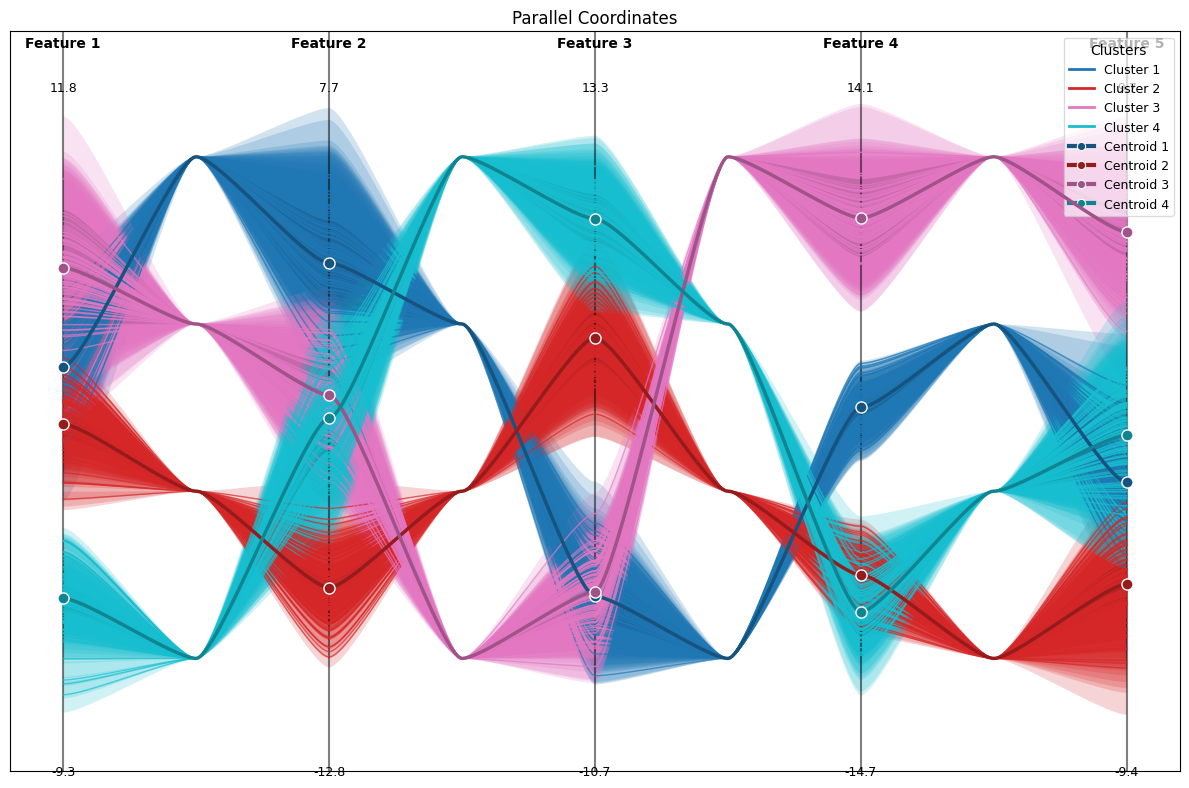

In [6]:
IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True,
                                      max_samples_per_cluster=100)